In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

target = "child_user"

In [7]:
df_master = pd.read_csv(r"C:\Flaskteam_projects\flask_basic\data\master_2015_2022.csv")

In [8]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   district             200 non-null    object 
 1   year                 200 non-null    int64  
 2   grdp                 200 non-null    int64  
 3   basic_beneficiaries  200 non-null    int64  
 4   multicultural_hh     200 non-null    int64  
 5   population           200 non-null    int64  
 6   divorce              200 non-null    int64  
 7   child_facility       200 non-null    int64  
 8   child_user           200 non-null    int64  
 9   single_parent        200 non-null    int64  
 10  birth_cnt            200 non-null    int64  
 11  academy_cnt          200 non-null    float64
dtypes: float64(1), int64(10), object(1)
memory usage: 18.9+ KB


In [9]:
df_master.head()

,district,year,grdp,basic_beneficiaries,multicultural_hh,population,divorce,child_facility,child_user,single_parent,birth_cnt,academy_cnt
0,종로구,2015,26762944,3540,1331,11008,276,12,305,480,906,115.1
1,중구,2015,54594969,3916,1156,7818,267,5,169,417,950,72.7
2,용산구,2015,12981760,5696,2110,17997,424,6,163,728,1967,79.2
3,성동구,2015,10728559,7125,1985,21972,563,12,344,1011,2753,107.8
4,광진구,2015,6343138,7332,2586,27104,651,17,496,1511,2951,123.6


In [10]:
df_master.isna().sum()


district               0
year                   0
grdp                   0
basic_beneficiaries    0
multicultural_hh       0
population             0
divorce                0
child_facility         0
child_user             0
single_parent          0
birth_cnt              0
academy_cnt            0
dtype: int64

In [11]:
df_master.describe()

,year,grdp,basic_beneficiaries,multicultural_hh,population,divorce,child_facility,child_user,single_parent,birth_cnt,academy_cnt
count,200.000000,2.000000e+02,200.0000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2018.500000,1.823560e+07,12462.9450,2756.445000,30108.980000,656.855000,17.100000,479.775000,1358.155000,2356.275000,146.188500
std,2.297038,1.858885e+07,6235.3445,1518.443033,12815.835043,215.072931,7.593967,230.907918,646.009639,1067.626136,62.190284
min,2015.000000,2.953193e+06,3517.0000,1084.000000,6620.000000,204.000000,2.000000,56.000000,288.000000,464.000000,71.100000
25%,2016.750000,6.365162e+06,7984.7500,1935.750000,21914.000000,528.000000,11.000000,307.250000,873.500000,1688.000000,108.600000
50%,2018.500000,9.738368e+06,11255.5000,2287.000000,27393.500000,660.500000,18.000000,501.000000,1310.500000,2233.500000,130.500000
75%,2020.250000,2.147367e+07,15261.7500,2785.750000,39554.250000,783.250000,23.000000,645.500000,1764.500000,2921.750000,161.125000
max,2022.000000,9.003371e+07,31884.0000,7798.000000,59655.000000,1120.000000,29.000000,912.000000,3075.000000,5899.000000,419.200000


In [12]:
df_ohe = pd.get_dummies(df_master.copy(), columns=["district"], drop_first=False)

district_ohe_cols = [c for c in df_ohe.columns if c.startswith("district_")]

print(f"원핫 컬럼 개수: {len(district_ohe_cols)}")
df_ohe.head()

원핫 컬럼 개수: 25


,year,grdp,basic_beneficiaries,multicultural_hh,population,divorce,child_facility,child_user,single_parent,birth_cnt,...,district_성동구,district_성북구,district_송파구,district_양천구,district_영등포구,district_용산구,district_은평구,district_종로구,district_중구,district_중랑구
0,2015,26762944,3540,1331,11008,276,12,305,480,906,...,False,False,False,False,False,False,False,True,False,False
1,2015,54594969,3916,1156,7818,267,5,169,417,950,...,False,False,False,False,False,False,False,False,True,False
2,2015,12981760,5696,2110,17997,424,6,163,728,1967,...,False,False,False,False,False,True,False,False,False,False
3,2015,10728559,7125,1985,21972,563,12,344,1011,2753,...,True,False,False,False,False,False,False,False,False,False
4,2015,6343138,7332,2586,27104,651,17,496,1511,2951,...,False,False,False,False,False,False,False,False,False,False


변수 분포도

In [ ]:
feature_cols = [
    'grdp',
    'basic_beneficiaries',
    'multicultural_hh',
    'population',
    'divorce',
    'child_user',       # 타겟도 같이
    'single_parent',
    'birth_cnt',
    'academy_cnt'
]

# 그리드 형식으로 그래프 정렬
plt.figure(figsize=(16, 18))

for i, col in enumerate(feature_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_master[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


타깃 분포 비교

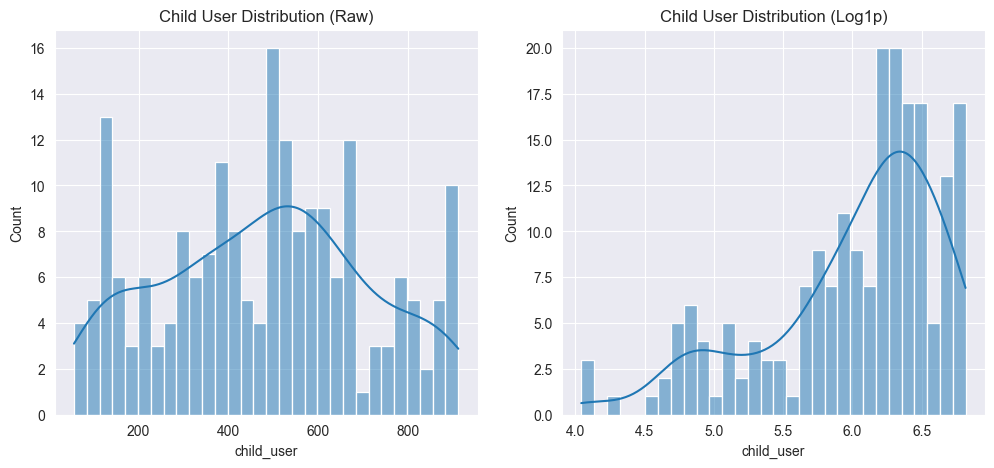

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df_master["child_user"], kde=True, bins=30, ax=axes[0])
axes[0].set_title("Child User Distribution (Raw)")

sns.histplot(np.log1p(df_master["child_user"]), kde=True, bins=30, ax=axes[1])
axes[1].set_title("Child User Distribution (Log1p)")

plt.show()


Boxplot(Log Scale) 분석

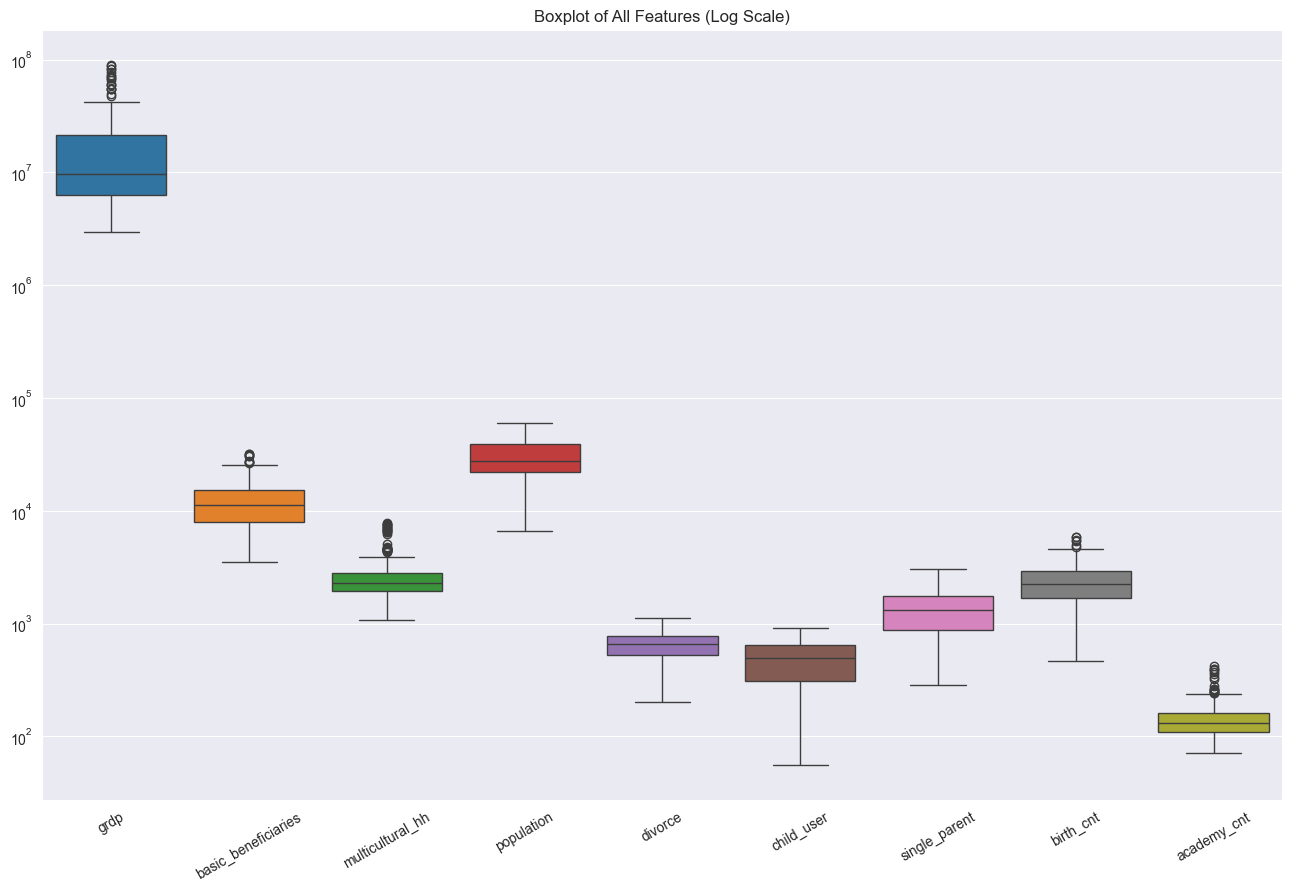

In [14]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=df_master[['grdp','basic_beneficiaries','multicultural_hh',
                            'population','divorce','child_user',
                            'single_parent','birth_cnt','academy_cnt']])
plt.yscale('log')
plt.xticks(rotation=30)
plt.title("Boxplot of All Features (Log Scale)")
plt.show()


상관관계 히트맵

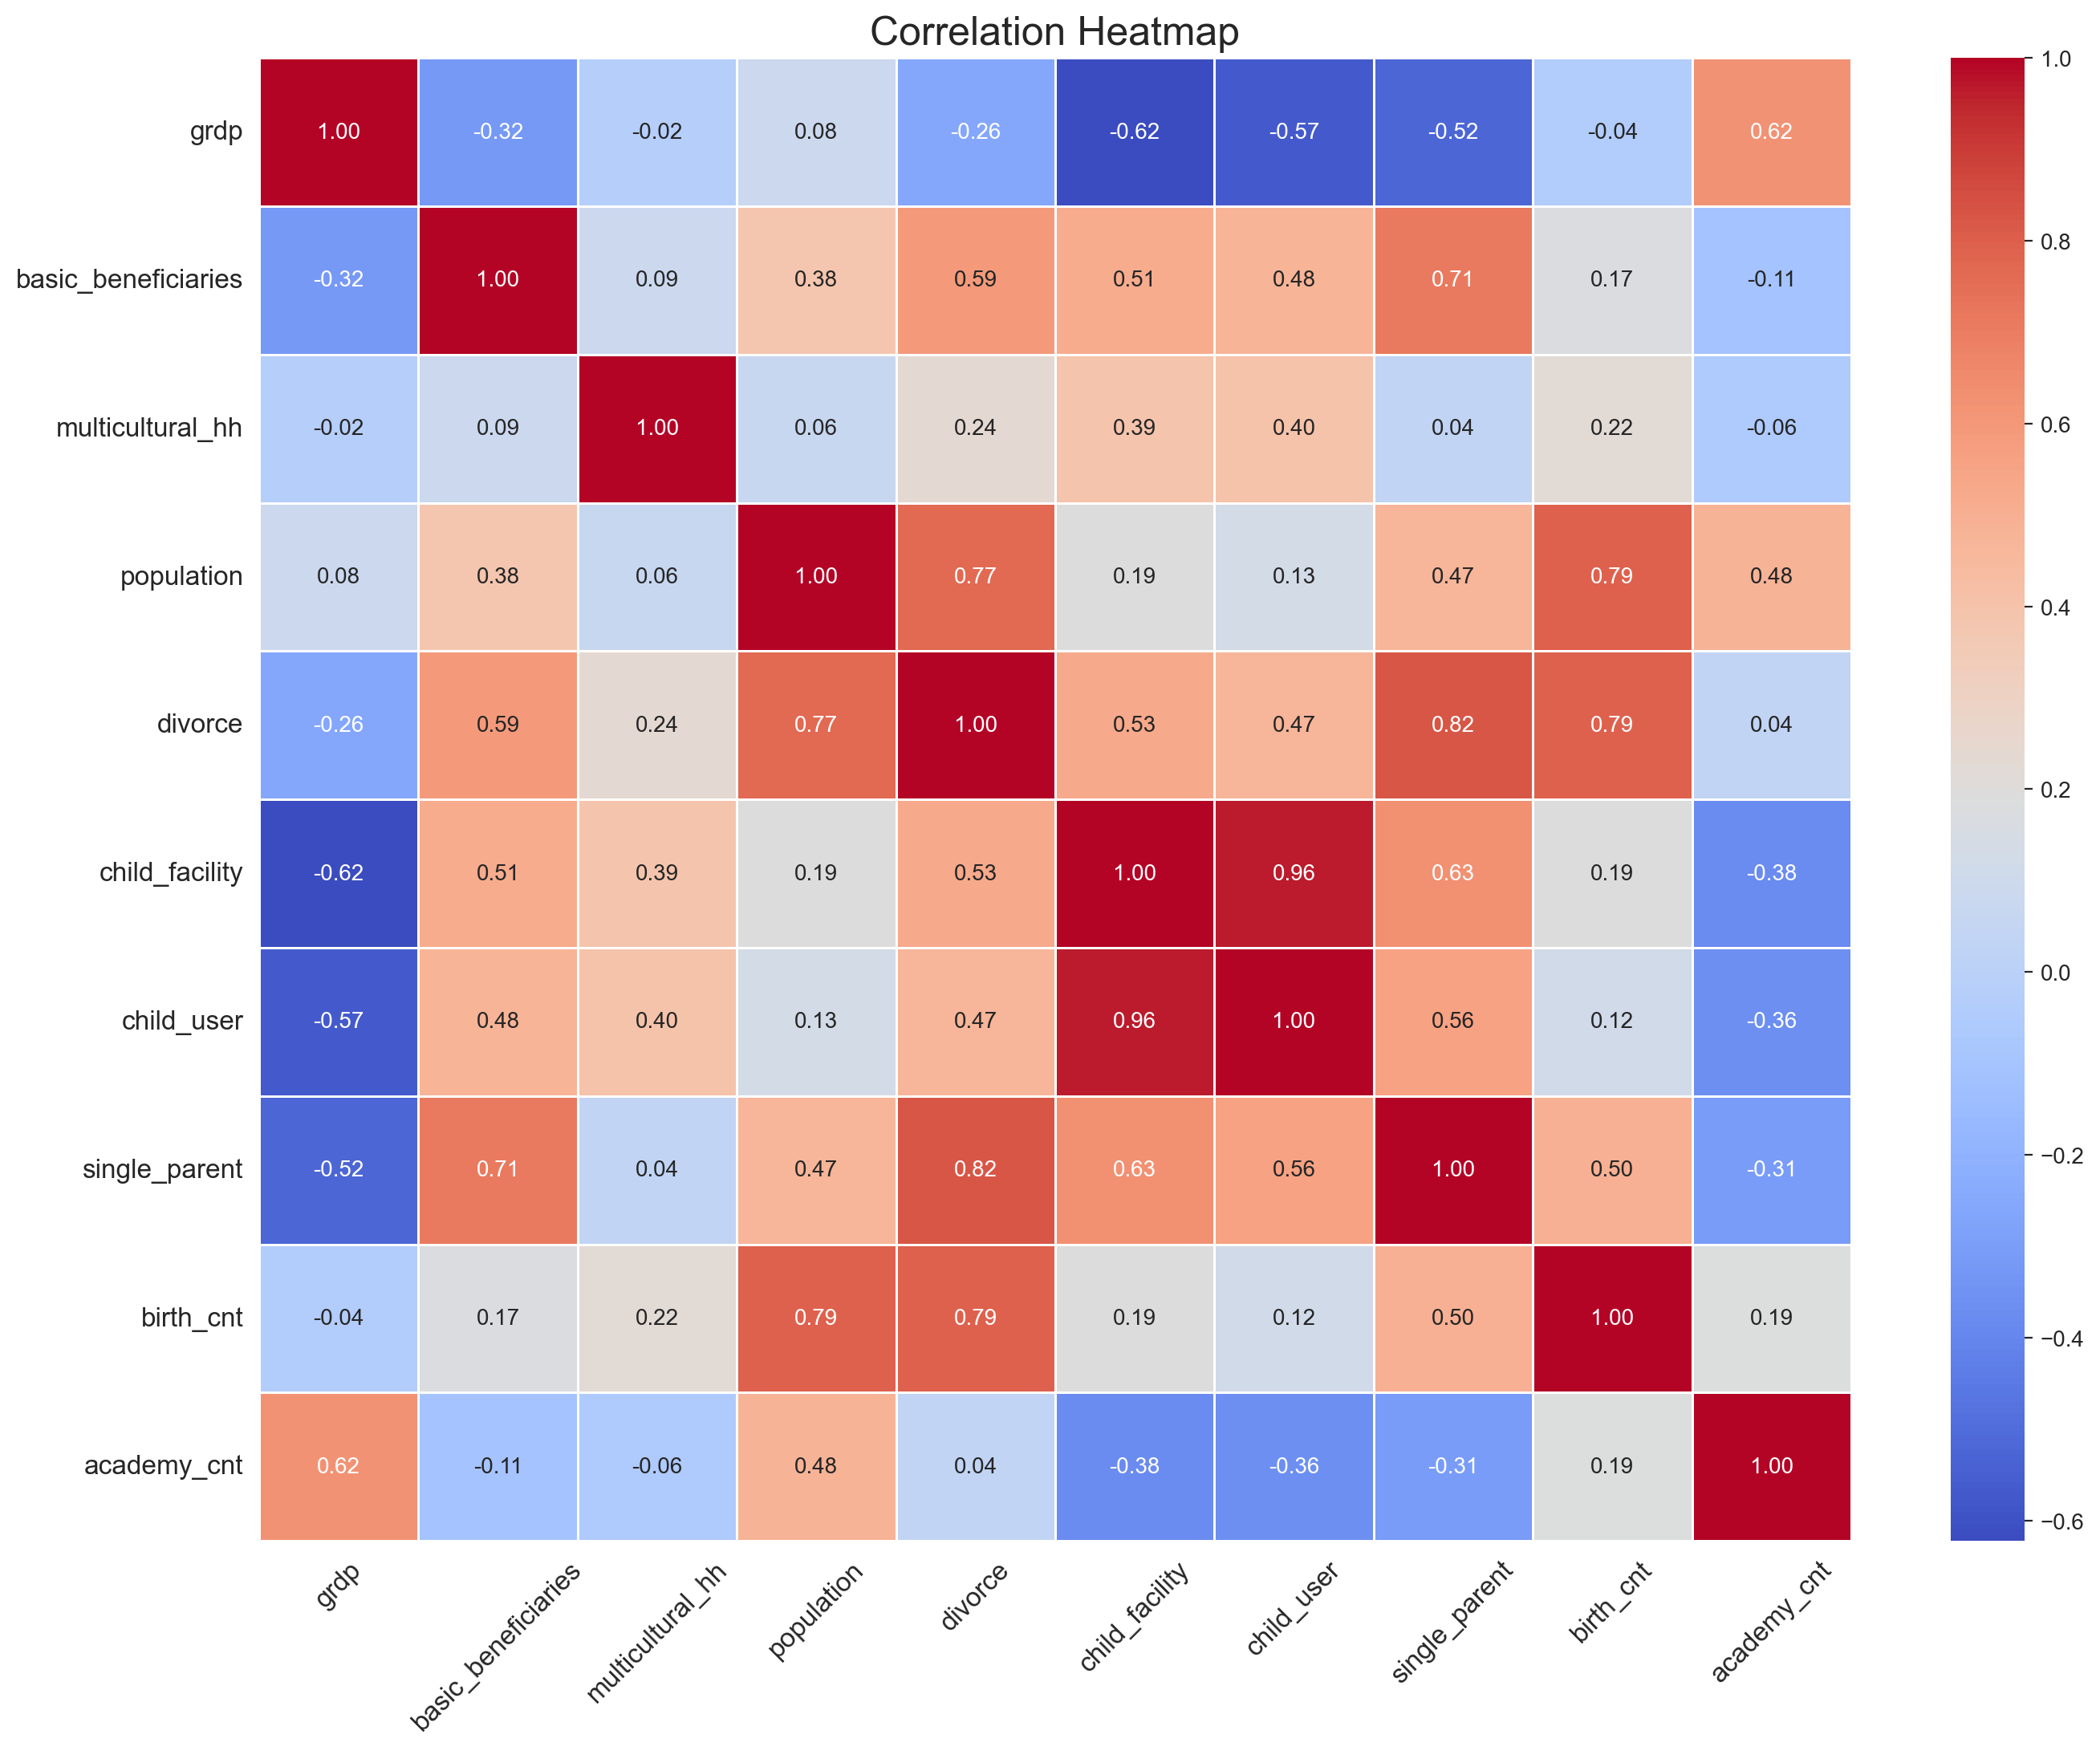

In [15]:
df_num = df_master.drop(columns=['district','year'])
plt.figure(figsize=(16,12), dpi=200)  # DPI 높여서 선명하게
sns.heatmap(
    df_num.corr(), 
    cmap='coolwarm',
    annot=True,          # 숫자 표시
    fmt=".2f",           # 소수점 두 자리
    linewidths=0.5,      # 경계선 선명하게
    linecolor='white'    # 경계선 색상
)
plt.title("Correlation Heatmap", fontsize=18)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

Scatterplot 분석

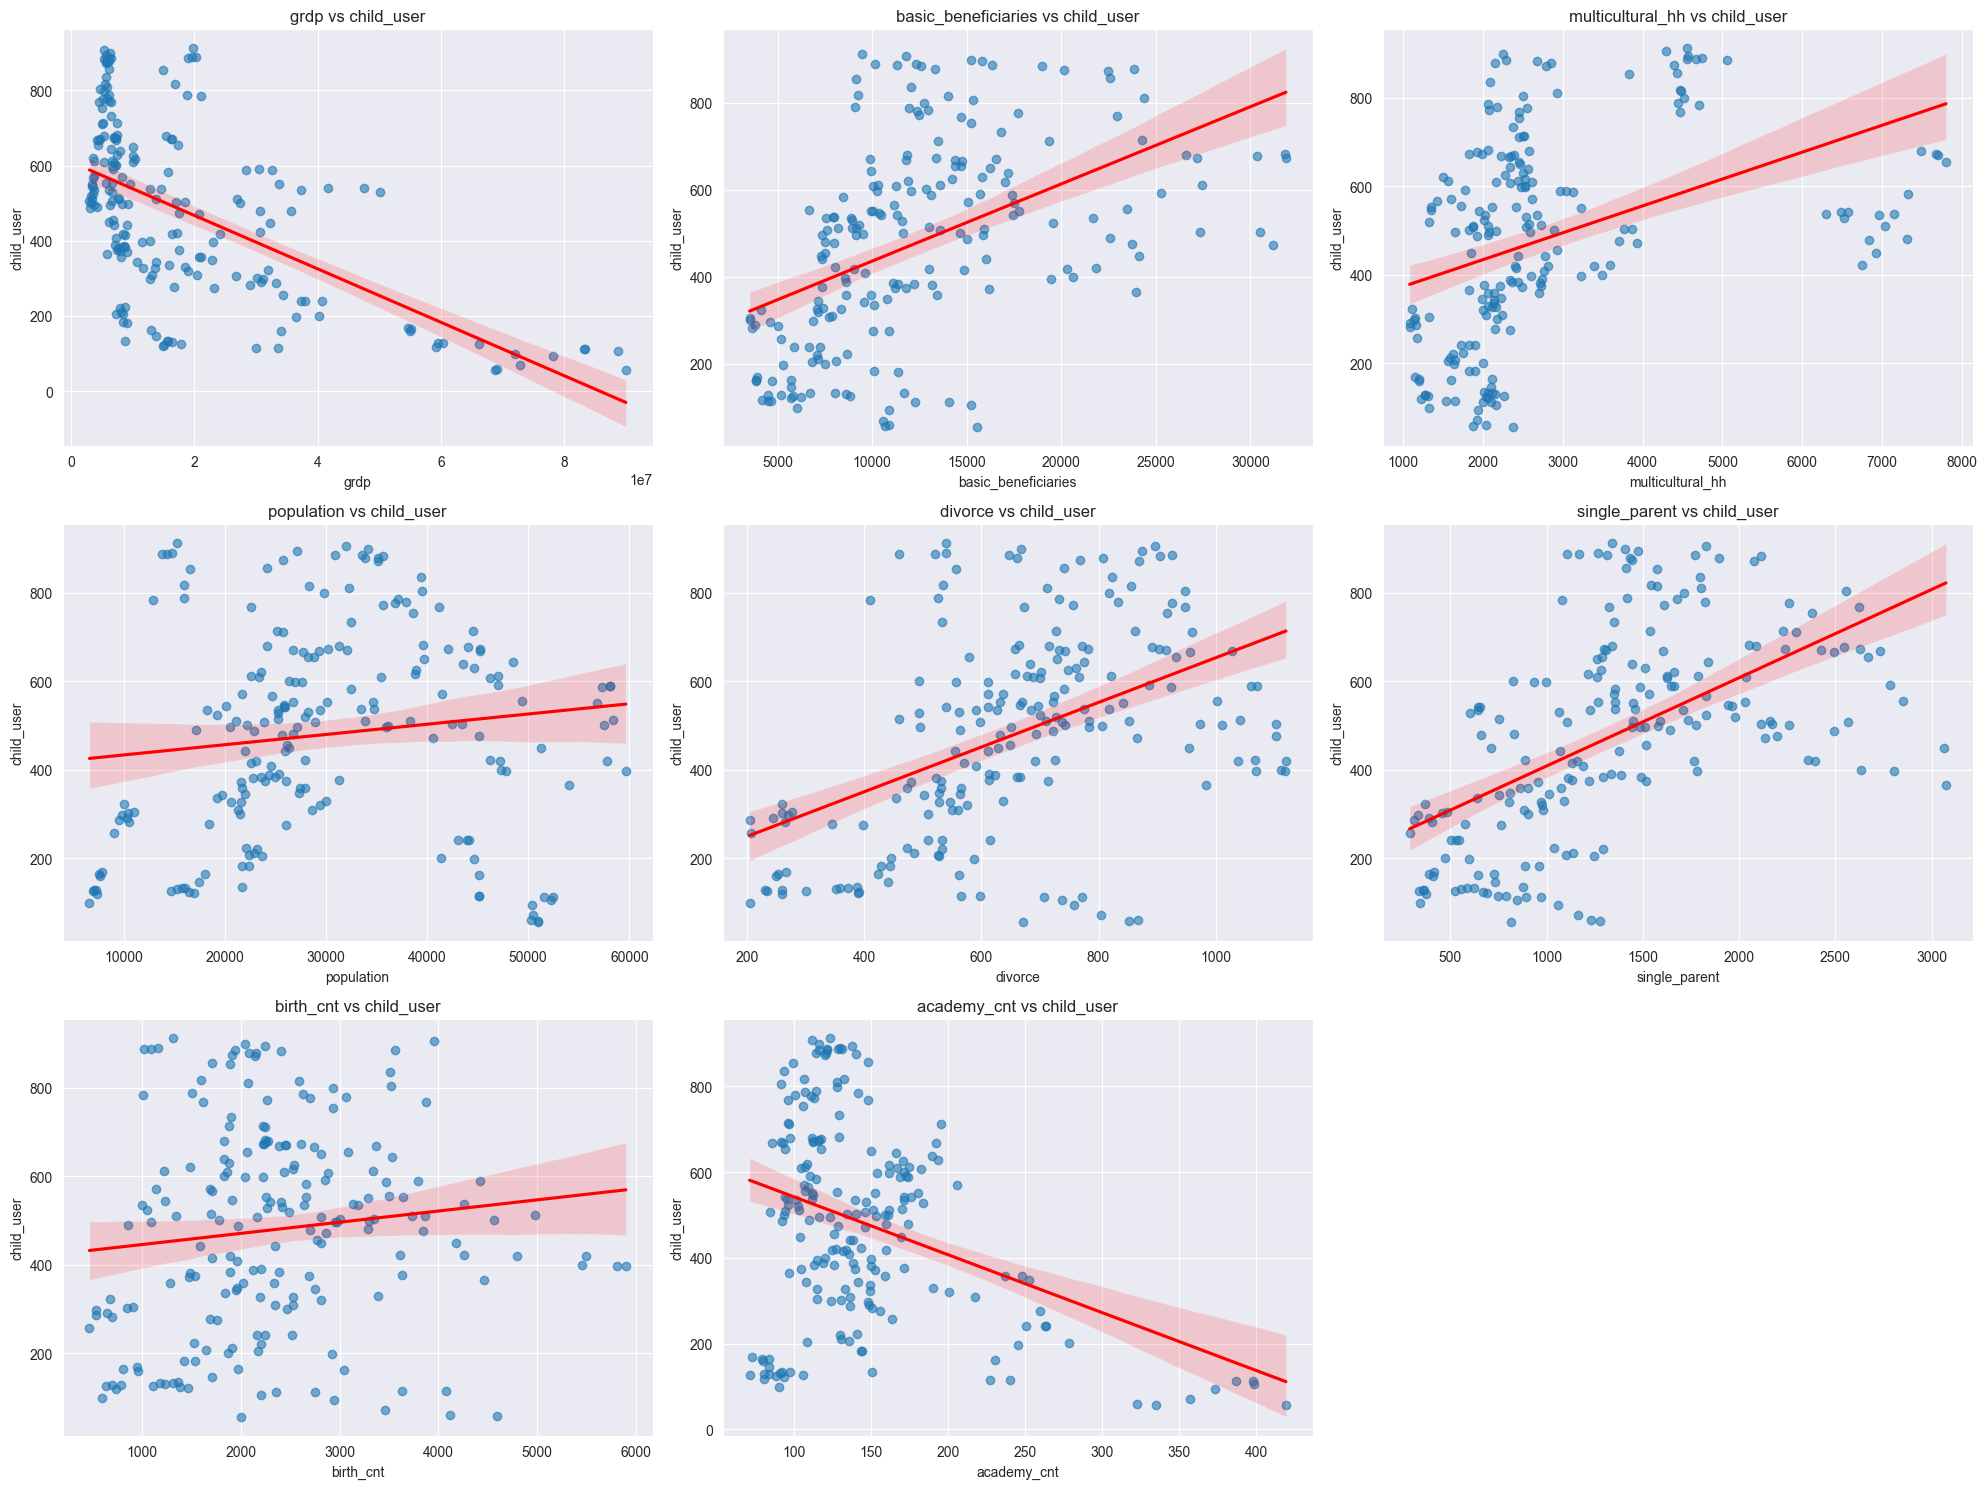

In [16]:
target = "child_user"

features = [
    "grdp", "basic_beneficiaries", "multicultural_hh",
    "population", "divorce", "single_parent",
    "birth_cnt", "academy_cnt"
]

plt.figure(figsize=(20, 15))

for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.regplot(
        data=df_master,
        x=col,
        y=target,
        scatter_kws={"alpha":0.6},
        line_kws={"color":"red"}
    )
    plt.title(f"{col} vs {target}")

plt.tight_layout()
plt.show()


연도별 추세(trend) 분석

<Figure size 1400x1000 with 0 Axes>

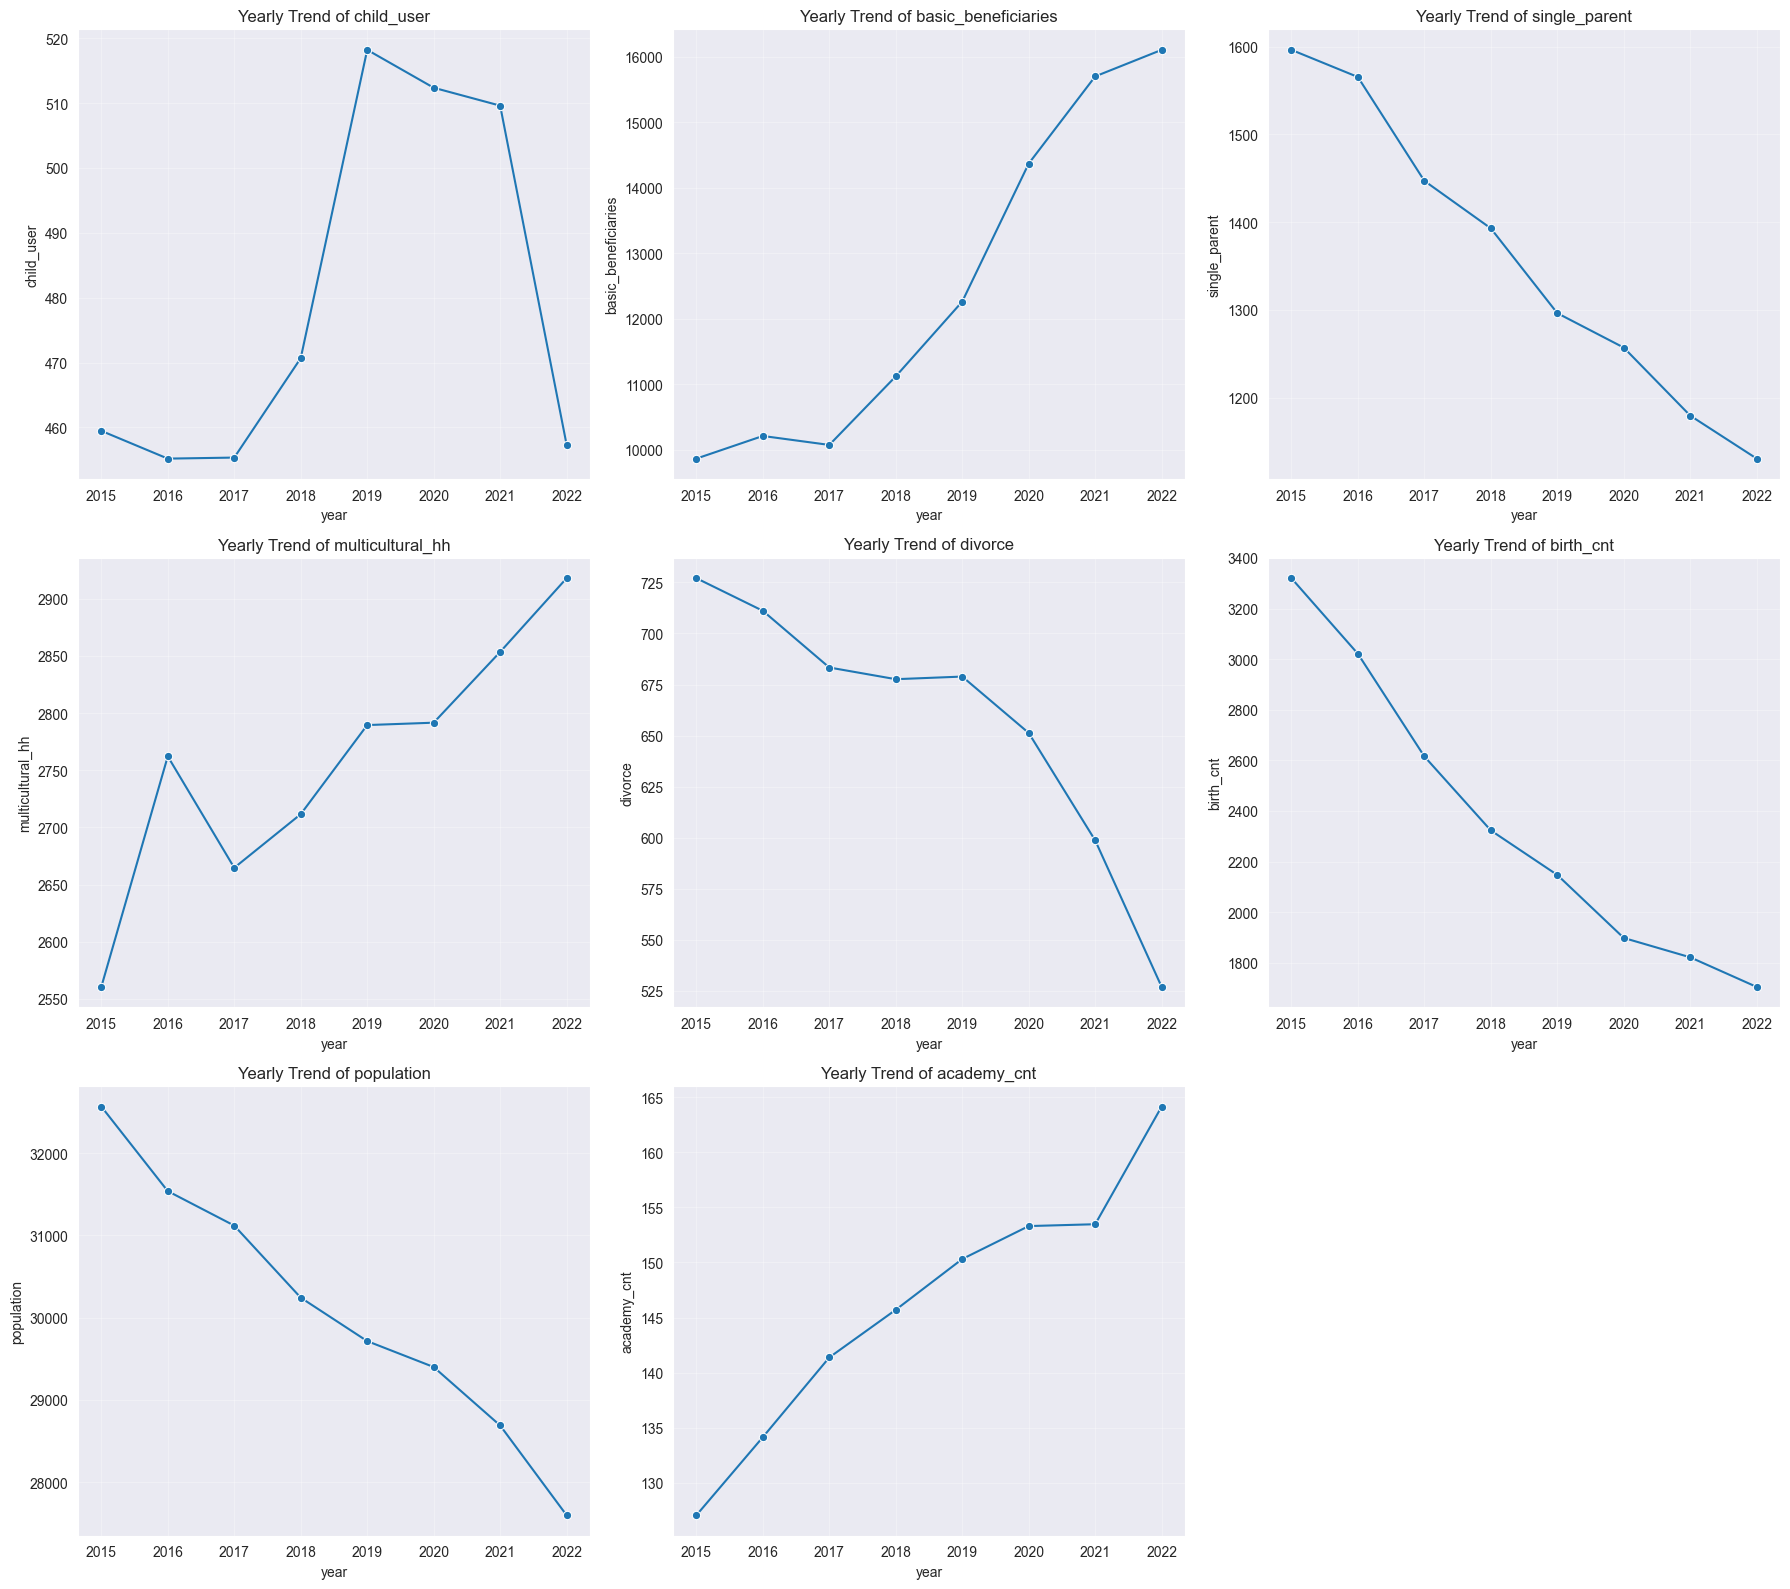

In [17]:
plt.figure(figsize=(14, 10))

features = [
    "child_user",
    "basic_beneficiaries",
    "single_parent",
    "multicultural_hh",
    "divorce",
    "birth_cnt",
    "population",
    "academy_cnt"
]

df_year = df_master.groupby("year")[features].mean().reset_index()

plt.figure(figsize=(18, 16))

for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.lineplot(data=df_year, x="year", y=col, marker="o")
    plt.title(f"Yearly Trend of {col}")
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Feature Importance

C:\Users\eldorado\AppData\Local\Temp\ipykernel_23172\1172526508.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fi.head(20), x="importance", y="feature", palette="Greens_r")
C:\Users\eldorado\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\eldorado\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\eldorado\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) Arial.
  fig.canvas.print_f

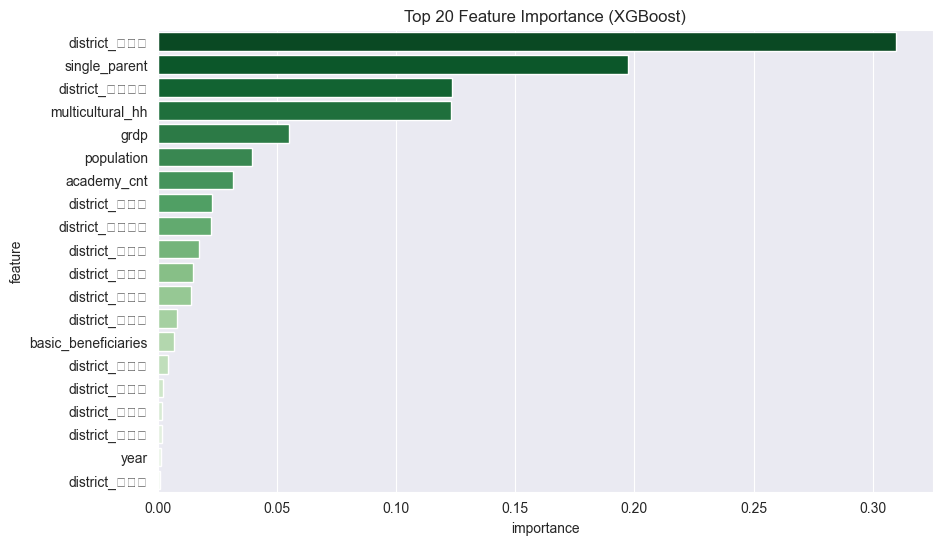

,feature,importance
10,district_강서구,0.309658
1,single_parent,0.197121
17,district_동대문구,0.123399
3,multicultural_hh,0.123183
5,grdp,0.054987
6,population,0.039743
4,academy_cnt,0.031718
27,district_용산구,0.022595
20,district_서대문구,0.022473
19,district_마포구,0.017317


In [21]:
from xgboost import XGBRegressor

X = df_ohe[["year","single_parent","basic_beneficiaries","multicultural_hh","academy_cnt","grdp","population"] + district_ohe_cols]
y = df_ohe["child_user"]

model_test = XGBRegressor(random_state=42)
model_test.fit(X, np.log1p(y))  # log scale 학습 동일하게

importances = model_test.feature_importances_

fi = pd.DataFrame({"feature": X.columns, "importance": importances}).sort_values("importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=fi.head(20), x="importance", y="feature", palette="Greens_r")
plt.title("Top 20 Feature Importance (XGBoost)")
plt.show()

fi.head(25)